In [22]:
# 01_explore_features.ipynb


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


feature_path = "../Data/Training_data/Feature_list.txt"
df = pd.read_csv(feature_path, delim_whitespace=True)

print("✅ Dataset loaded — shape:", df.shape)
df.head()


✅ Dataset loaded — shape: (4947, 11)


C:\Users\magnu\AppData\Local\Temp\ipykernel_23280\2197448887.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(feature_path, delim_whitespace=True)


,,Eigenvalue_curvature,anisotropy,linearity,planarity,sphericity,variation,grad_x,grad_y,mean_curvature,surface_density,Volume_Density
0.004832,0.992767,0.510421,0.482347,0.007233,0.992819,0.278053,0.102154,0.224605,0.304214,0.078822,0.157468,0.053102
0.018127,0.979129,0.869495,0.109634,0.020871,0.979556,0.557503,0.679877,1.149232,1.795487,-0.939251,0.157468,0.016214
0.045848,0.911404,0.156215,0.755189,0.088596,0.918614,0.693254,1.002034,1.113277,1.157822,0.453833,0.157468,0.036325
0.074825,0.882382,0.545715,0.336667,0.117618,0.894760,1.068003,0.468983,1.132793,0.484019,0.731748,0.157468,0.035953
0.021500,0.975310,0.876312,0.098998,0.024690,0.975905,1.785414,4.457934,2.063277,1.761482,-1.637155,0.157468,0.022094


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Eigenvalue_curvature,4947.0,0.604440,1.981518e-01,0.021327,0.478480,0.625132,0.758476,0.978998
anisotropy,4947.0,0.343586,1.922324e-01,0.004809,0.193134,0.319523,0.470419,0.965902
linearity,4947.0,0.051974,5.487927e-02,0.000027,0.014294,0.034445,0.070542,0.423624
planarity,4947.0,0.952941,4.518376e-02,0.702432,0.934106,0.966702,0.985907,0.999973
sphericity,4947.0,1.149475,2.527851e+00,0.007742,0.331114,0.621220,1.106492,71.896156
variation,4947.0,1.561549,2.789108e+00,0.013313,0.444392,0.811882,1.562760,48.567905
grad_x,4947.0,1.848281,3.519136e+00,0.003102,0.485887,0.928578,1.834547,72.995216
grad_y,4947.0,2.051585,3.869203e+00,0.013996,0.527447,1.014937,2.039530,76.107498
mean_curvature,4947.0,0.007661,2.557043e+00,-31.742108,-0.496907,-0.007687,0.453703,57.407780
surface_density,4947.0,0.157468,5.551676e-17,0.157468,0.157468,0.157468,0.157468,0.157468


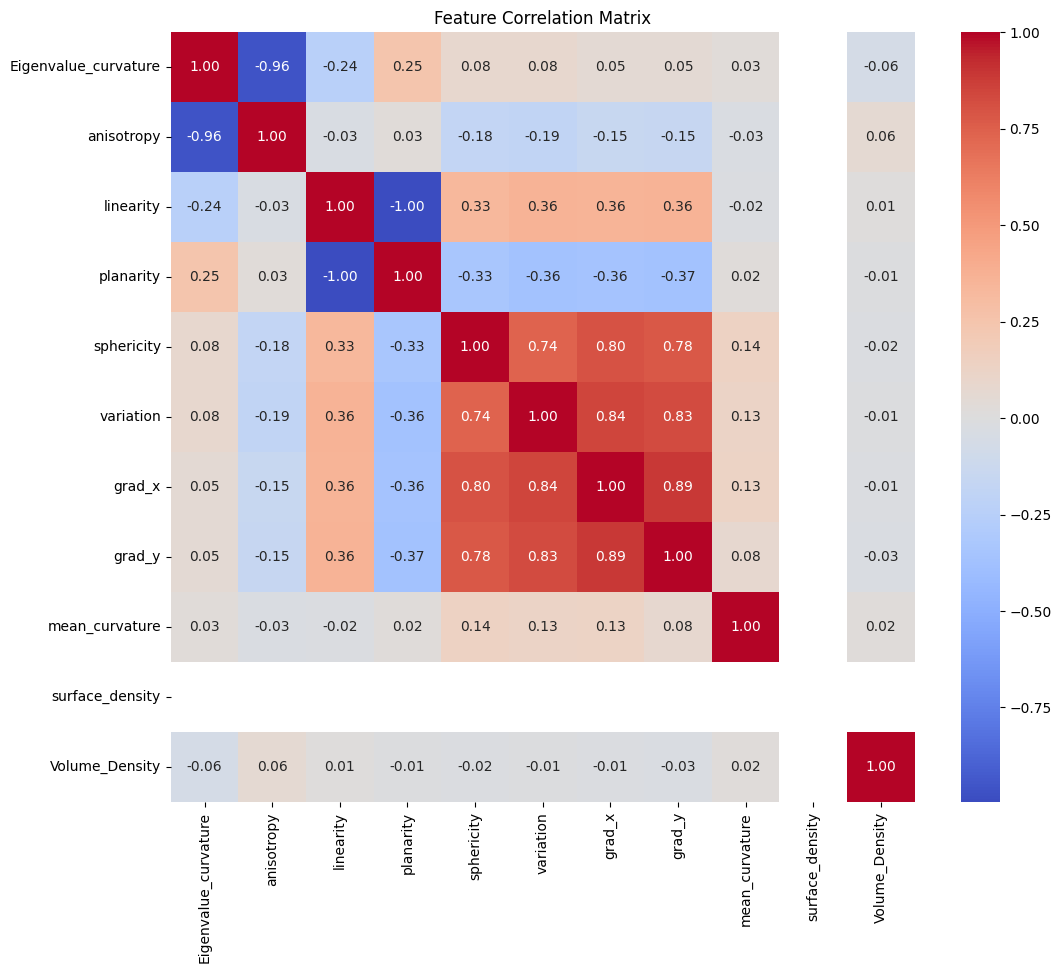

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()